In [4]:
# Importing all the necessary libraries:

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from pathlib import Path

plt.style.use('dark_background')

In [5]:
base_path=Path.cwd().parent
csv_path=base_path/"outputs"/"Canonical-OneShift-TipsConditioned"/"metadata.csv"
print(csv_path)

c:\Users\khadk\OneDrive\Desktop\phylogenetics\outputs\Canonical-OneShift-TipsConditioned\metadata.csv


In [6]:
trees=pd.read_csv(csv_path)
trees.shape

(1000, 7)

In [7]:
trees.head()

,file_id,t1,la1,mu_over_la1,psi,la2_multiplier,n_tips
0,1,7.755243,0.300436,0.583149,0.718057,2.422976,261
1,4,4.398782,0.043719,0.510420,0.422254,4.203602,852
2,6,5.408794,0.396355,0.413940,0.905547,3.557958,172
3,10,6.679696,0.693649,0.894559,0.487594,2.399439,655
4,7,7.179408,0.592200,0.063483,0.759864,3.017225,537


In [8]:
trees.isnull().mean()*100

file_id           0.0
t1                0.0
la1               0.0
mu_over_la1       0.0
psi               0.0
la2_multiplier    0.0
n_tips            0.0
dtype: float64

In [9]:
trees.duplicated().sum()

np.int64(0)

In [10]:
trees.describe().T

,count,mean,std,min,25%,50%,75%,max
file_id,1000.0,499.500000,288.819436,0.000000,249.750000,499.500000,749.250000,999.000000
t1,1000.0,5.972679,1.146073,4.003567,5.005405,5.915268,6.946861,7.986751
la1,1000.0,0.366589,0.231891,0.010654,0.177969,0.339262,0.516376,0.993101
mu_over_la1,1000.0,0.479962,0.263172,0.001221,0.250491,0.504511,0.713632,0.899598
psi,1000.0,0.563295,0.256037,0.102473,0.344595,0.572310,0.781174,0.999957
la2_multiplier,1000.0,3.272128,0.863649,2.010032,2.483506,3.192860,3.968616,4.999711
n_tips,1000.0,540.117000,260.831145,100.000000,321.750000,517.000000,768.250000,999.000000


In [11]:
trees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   file_id         1000 non-null   int64  
 1   t1              1000 non-null   float64
 2   la1             1000 non-null   float64
 3   mu_over_la1     1000 non-null   float64
 4   psi             1000 non-null   float64
 5   la2_multiplier  1000 non-null   float64
 6   n_tips          1000 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 54.8 KB


In [12]:
def plot_kde(df:pd.DataFrame,cols:str):
    fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(12,6))
    axes=axes.flatten()
    for index,col in enumerate(cols):
        if index<len(axes):
            sns.kdeplot(df[col],fill=True,color='purple',ax=axes[index])
            axes[index].set_title(f'KDE of {col}')
    plt.tight_layout()
    plt.show()

In [13]:
num_cols=[col for col in trees.columns if col!='tree_id']
num_cols

['file_id', 't1', 'la1', 'mu_over_la1', 'psi', 'la2_multiplier', 'n_tips']

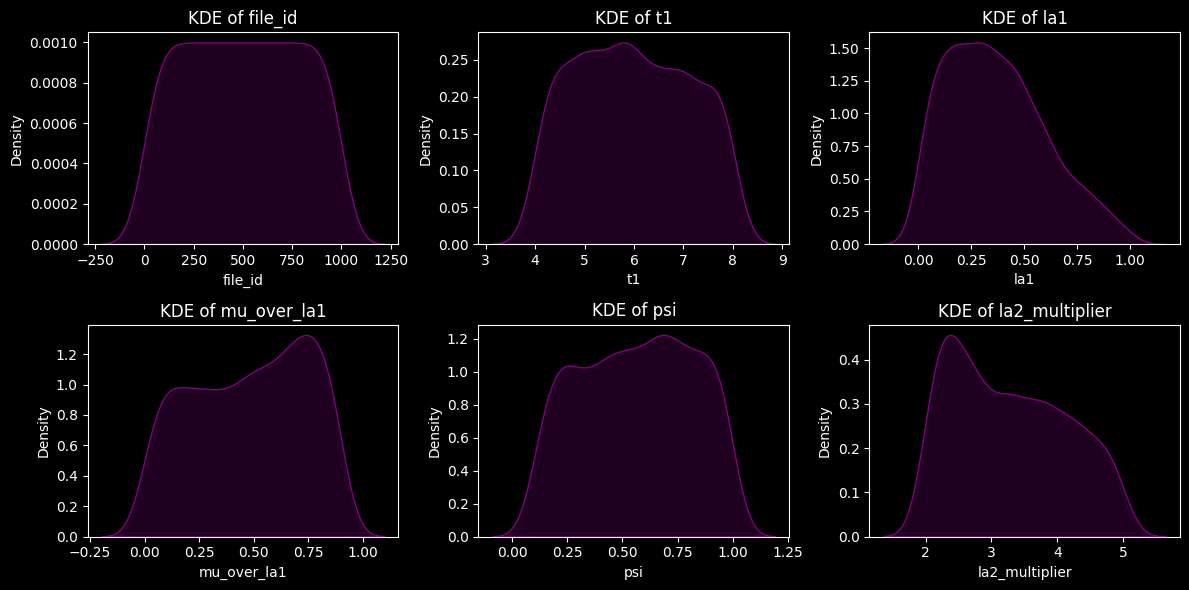

In [14]:
plot_kde(trees,num_cols)